#  Use the dataset from TFRecord files to build and train a model

## Import all the necessary libraries

In [1]:
import os
import glob
from datetime import datetime

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

%matplotlib inline

tf.__version__

'2.0.0-beta1'

## Load the `tf.data.Dataset` from TFRecord files

In [2]:
raw_train_dataset = tf.data.TFRecordDataset('images.tfrecord')
raw_train_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

## Parse the dataset

In [ ]:
for raw_train_data in raw_train_dataset.take(-1):    
    example = tf.train.Example()
    example.ParseFromString(raw_train_data.numpy())  
    print(example)

In [4]:
# Create a dictionary describing the features.
image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_train_dataset = raw_train_dataset.map(_parse_image_function)
parsed_train_dataset

<MapDataset shapes: {depth: (), height: (), image_raw: (), label: (), width: ()}, types: {depth: tf.int64, height: tf.int64, image_raw: tf.string, label: tf.int64, width: tf.int64}>

### Recover the images from the TFRecord file:

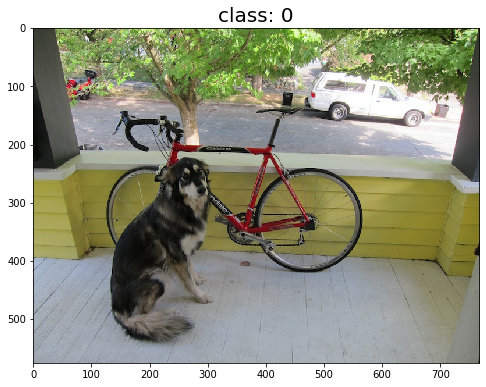

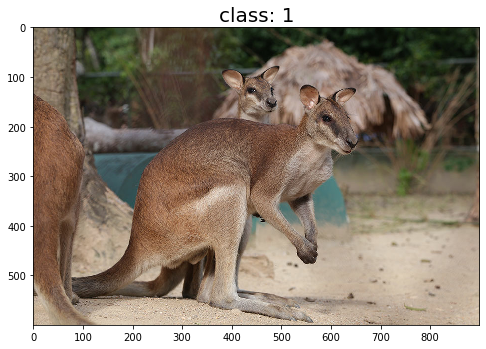

In [5]:
for image_features in parsed_train_dataset:
    image_string = image_features['image_raw'].numpy()
    label = image_features['label'].numpy()
    image_data = tf.image.decode_jpeg(image_string, channels=3)
    
    f, (ax1) = plt.subplots(1, 1, figsize=(8,8))
    f.subplots_adjust(hspace = .2, wspace = .05)
    
    ax1.imshow(image_data)
    ax1.set_title('class: {}'.format(label), fontsize=20)


In [9]:
train_ds = parsed_train_dataset.shuffle(buffer_size=10000).batch(2).repeat(10)


for batch in train_ds.take(-1):
    print('width: ', batch['width'].numpy(), 'height: ', batch['height'].numpy())

width:  [768 900] height:  [576 600]
width:  [900 768] height:  [600 576]
width:  [900 768] height:  [600 576]
width:  [900 768] height:  [600 576]
width:  [768 900] height:  [576 600]
width:  [768 900] height:  [576 600]
width:  [900 768] height:  [600 576]
width:  [900 768] height:  [600 576]
width:  [768 900] height:  [576 600]
width:  [768 900] height:  [576 600]
